<a href="https://colab.research.google.com/github/deepsharma26/SIRT1_ML_NPASS/blob/main/Part4_Lazy_Classifier_without_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lazy Predict Classifier without any sampling stratigies.
This step helped to get rough idea about the algorithm which could be used for the refined model.

In [ ]:
!pip install lazypredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 789.2/789.2 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
df=pd.read_csv('Final_full_Top20.csv') #Use your input dataset befoe spliting
df

,MACCSFP52,MACCSFP54,MACCSFP73,MACCSFP79,MACCSFP82,MACCSFP90,MACCSFP91,MACCSFP92,MACCSFP97,MACCSFP100,...,MACCSFP113,MACCSFP118,MACCSFP125,MACCSFP128,MACCSFP129,MACCSFP137,MACCSFP138,MACCSFP140,MACCSFP152,BioactivityClass
0,0,0,0,0,0,1,1,1,1,0,...,0,1,1,0,0,1,0,0,0,1
1,0,0,0,0,0,1,1,1,1,0,...,0,1,1,0,0,1,0,0,0,1
2,0,0,0,0,0,1,1,1,1,0,...,0,1,1,0,0,1,0,0,0,0
3,0,0,0,0,0,1,1,1,1,0,...,0,1,1,1,1,1,0,0,0,1
4,0,0,0,0,0,1,1,0,1,0,...,0,1,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,0,0,1,0,1,0,1,1,0,1,...,0,1,1,1,1,1,1,0,0,1
954,0,1,1,1,1,1,1,1,0,1,...,0,1,1,1,1,0,1,0,0,0
955,0,1,0,1,1,1,1,1,0,1,...,0,1,1,1,1,0,1,1,0,0
956,0,1,0,0,0,1,1,0,0,0,...,1,0,0,1,0,1,0,1,1,0


In [ ]:
df.isna().sum()
df.dropna(inplace=True)

In [ ]:
X = df.drop('BioactivityClass', axis=1)
Y = df['BioactivityClass']

In [ ]:
Y = df['BioactivityClass']
Y

,BioactivityClass
0,1
1,1
2,0
3,1
4,0
...,...
953,1
954,0
955,0
956,0


In [ ]:
!pip install dask[dataframe]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y,random_state=100)

In [ ]:
X_train.shape, Y_train.shape

((670, 20), (670,))

In [ ]:
X_test.shape, Y_test.shape

((288, 20), (288,))

In [ ]:
X_train.to_csv("MACCS_X_train_set.csv", index=False)
X_test.to_csv("MACCS_X_test_set.csv", index=False)
Y_train.to_csv("MACCS_Y_train_set.csv", index=False)
Y_test.to_csv("MACCS_Y_test_set.csv", index=False)

#Plotting PCA for train and test set

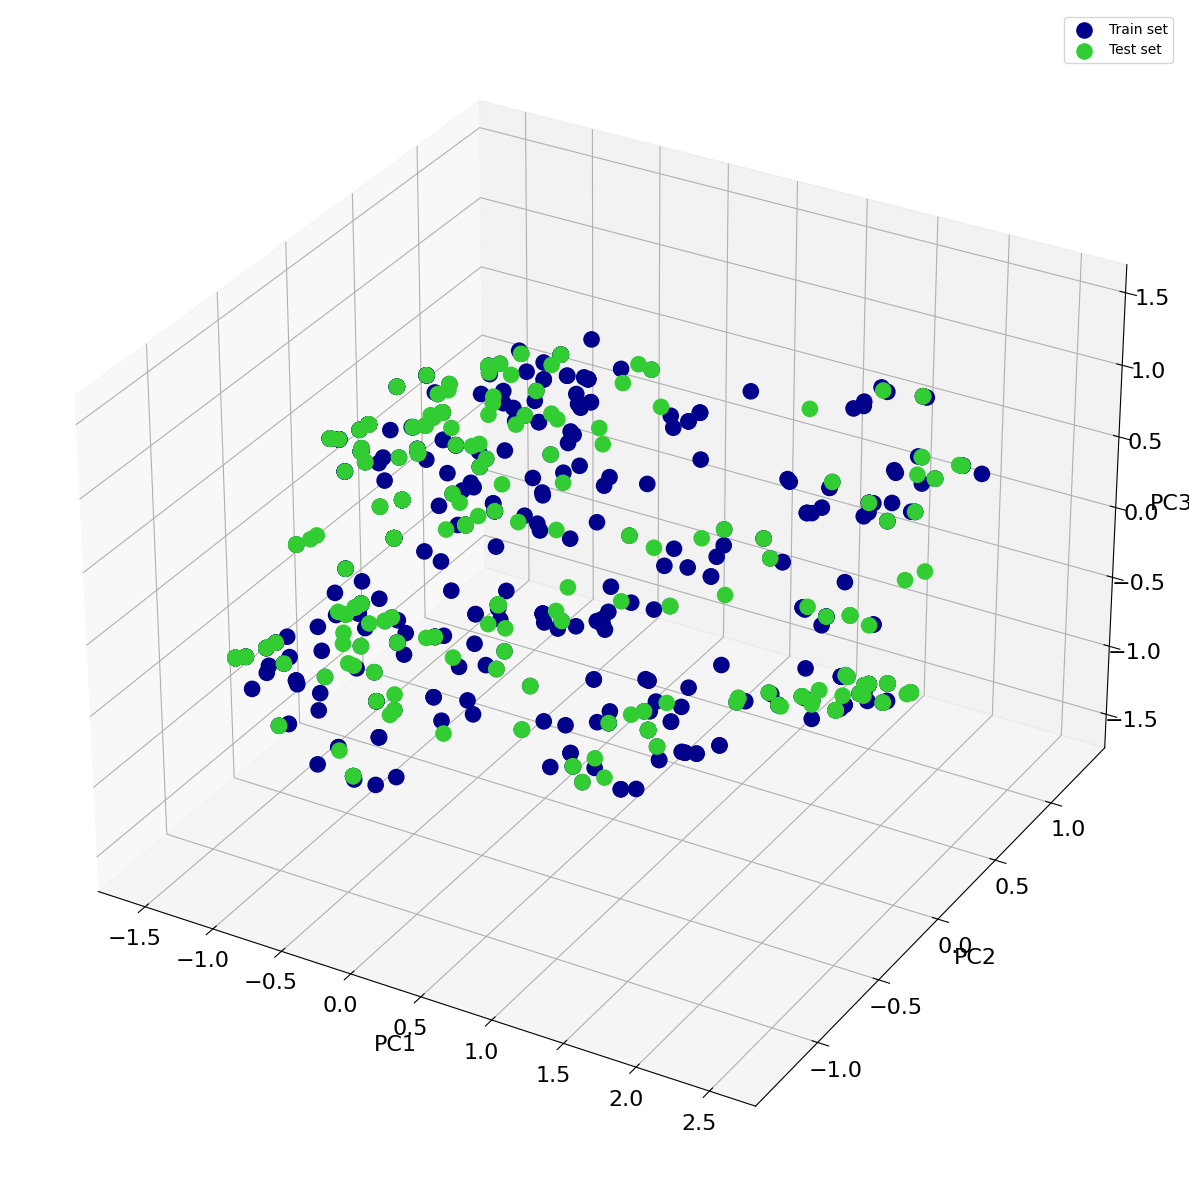

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# The 'Name' column does not exist in X_train and X_test, so dropping it is unnecessary.
X_train_pca = X_train
X_test_pca = X_test

# Fit PCA
pca = PCA(n_components=3)
pca_train = pca.fit_transform(X_train_pca)
pca_test  = pca.transform(X_test_pca)

# 3D Plot
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_train[:,0], pca_train[:,1], pca_train[:,2], c='darkblue', s=120, alpha=1.0, label='Train set')
ax.scatter(pca_test[:,0],  pca_test[:,1],  pca_test[:,2],  c='limegreen', s=120, alpha=1.0, label='Test set')

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='z', labelsize=16)

ax.set_xlabel("PC1", fontsize=16)
ax.set_ylabel("PC2", fontsize=16)
ax.set_zlabel("PC3", fontsize=16)

ax.legend()
plt.tight_layout()
plt.savefig("PCA_Train_Test_3D_new.png", dpi=300, bbox_inches='tight')
plt.show()

#Building models with LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train_pca, X_test_pca, Y_train, Y_test)
models

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 108, number of negative: 562
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 60
[LightGBM] [Info] Number of data points in the train set: 670, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161194 -> initscore=-1.649371
[LightGBM] [Info] Start training from score -1.649371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelSpreading,0.84,0.74,0.74,0.85,0.16
LabelPropagation,0.84,0.74,0.74,0.85,0.10
RandomForestClassifier,0.86,0.73,0.73,0.86,0.50
LGBMClassifier,0.85,0.72,0.72,0.85,0.20
BaggingClassifier,0.85,0.72,0.72,0.85,0.18
BernoulliNB,0.76,0.72,0.72,0.78,0.06
QuadraticDiscriminantAnalysis,0.79,0.72,0.72,0.80,0.08
DecisionTreeClassifier,0.84,0.72,0.72,0.84,0.09
ExtraTreesClassifier,0.85,0.72,0.72,0.85,0.32


In [ ]:
! zip SIRT1_lazyclassifier.zip *.csv *.png

updating: Final_Trainset_Top20.csv (deflated 94%)
updating: MACCS_X_test_set.csv (deflated 90%)
updating: MACCS_X_train_set.csv (deflated 91%)
updating: MACCS_Y_test_set.csv (deflated 86%)
updating: MACCS_Y_train_set.csv (deflated 89%)
updating: PCA_Train_Test_3D_new.png (deflated 11%)
